In [1]:
!pip install pandas

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import dataset

In [6]:
data=pd.read_csv("heart.csv")


In [5]:
X=data[["age","chol"]]
X

,age,chol
0,52,212
1,53,203
2,70,174
3,61,203
4,62,294
...,...,...
1020,59,221
1021,60,258
1022,47,275
1023,50,254


# Check missing values

In [7]:
X.isnull().sum()

age     0
chol    0
dtype: int64

In [8]:
X.describe()

,age,chol
count,1025.000000,1025.00000
mean,54.434146,246.00000
std,9.072290,51.59251
min,29.000000,126.00000
25%,48.000000,211.00000
50%,56.000000,240.00000
75%,61.000000,275.00000
max,77.000000,564.00000


# Visualize the features

Text(0, 0.5, 'age')

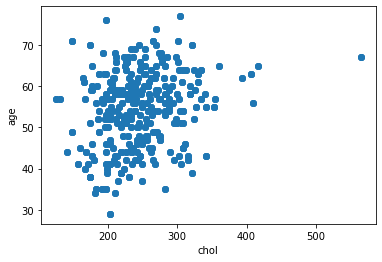

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X.chol,X.age)
plt.xlabel("chol")
plt.ylabel("age")

# Feature Scaling

In [13]:
#Converts value as mean =0 sd=1
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.26843658, -0.65933209],
       [-0.15815703, -0.83386117],
       [ 1.71659547, -1.39623266],
       ...,
       [-0.81983438,  0.56237149],
       [-0.4889957 ,  0.15513696],
       [-0.04787747, -1.12474297]])

# Fit model for different k

In [14]:
list(range(2,12))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [16]:
model_labels={}
centroids={}
i_score=[]
s_score=[]
for k in range(2,12):
    # model building
    model=KMeans(n_clusters=k)
    #model fit
    model=model.fit(X) 
    #get the output labels
    labels=model.labels_
    model_labels[k]=labels
    # inertia
    i_score.append(model.inertia_)
    # silhouette
    s_score.append(silhouette_score(X,labels))
    #centroids
    centroids[k]=model.cluster_centers_
    
    print(f"inertia {model.inertia_} silhouette {silhouette_score(X,labels)}")
    

inertia 1263.7902483998384 silhouette 0.36159750619583836
inertia 854.4356824031773 silhouette 0.370588310390703
inertia 687.9280460870406 silhouette 0.3572999226097502
inertia 553.2065573570628 silhouette 0.35812668020949984
inertia 465.691896463378 silhouette 0.3663847094424162
inertia 396.8007700590552 silhouette 0.36581934775880026
inertia 351.10875063202116 silhouette 0.3631797475150795
inertia 308.3064100022788 silhouette 0.3754670750102576
inertia 276.4809075867386 silhouette 0.3717698455269098
inertia 253.22186518385138 silhouette 0.3714059751457759


# Plot the inertia and silhouette score

Text(0.5, 0, 'k')

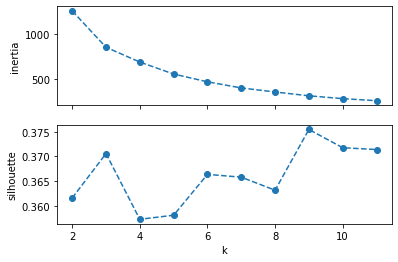

In [20]:
fig,ax=plt.subplots(2,1,sharex=True)
plt.subplot(211)#row,column,plot
plt.plot(range(2,12),i_score,"o--")
plt.ylabel("inertia")

plt.subplot(212)#row,column,plot
plt.plot(range(2,12),s_score,"o--")
plt.ylabel("silhouette")
plt.xlabel("k")

# Get the cluster label of the best model and plot the clusters

In [22]:
labels=model_labels[3]

In [23]:
centroids=centroids[3]

Text(0, 0.5, 'age')

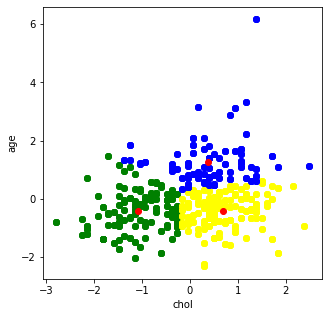

In [27]:
fig,ax=plt.subplots(figsize=(5,5))
#1st cluster
plt.scatter(X[labels==0,0],X[labels==0,1],c="green",label="cluster1")
#2nd cluster
plt.scatter(X[labels==1,0],X[labels==1,1],c="yellow",label="cluster2")
#3rd cluster
plt.scatter(X[labels==2,0],X[labels==2,1],c="blue",label="cluster3")
#3cluster centroids
plt.scatter(centroids[:,0],centroids[:,1],c="r")
plt.xlabel("chol")
plt.ylabel("age")

In [28]:
analysis=data[["age","chol"]].copy()
analysis

,age,chol
0,52,212
1,53,203
2,70,174
3,61,203
4,62,294
...,...,...
1020,59,221
1021,60,258
1022,47,275
1023,50,254


In [29]:
analysis["label"]=labels
analysis

,age,chol,label
0,52,212,0
1,53,203,1
2,70,174,1
3,61,203,1
4,62,294,2
...,...,...,...
1020,59,221,1
1021,60,258,1
1022,47,275,0
1023,50,254,0
